# Heart Failure Prediction
The techiniques used in this project include as follows:
 1. Decision Tree
 2. Random Forest
 3. Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


58.76190640394089


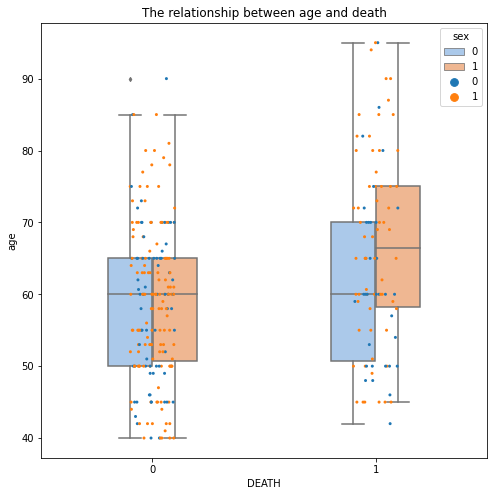

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
survive = data.loc[(data.DEATH_EVENT == 0)].age
death = data.loc[(data.DEATH_EVENT == 1)].age
print(survive.mean())

sns.boxplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', width = 0.4, ax = ax, fliersize = 3, palette=sns.color_palette("pastel"))
sns.stripplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', size = 3, palette=sns.color_palette())
ax.set(xlabel = 'DEATH', ylabel="age", title='The relationship between age and death')
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

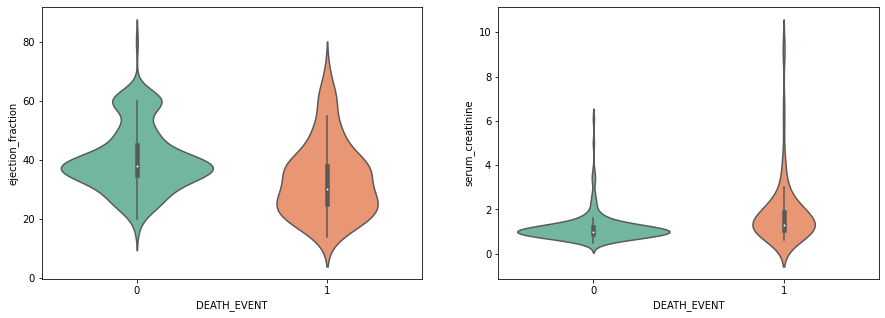

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize = (15, 5))
sns.violinplot(data=data, x='DEATH_EVENT', y='ejection_fraction', ax=ax[0], palette=sns.color_palette('Set2'))
sns.violinplot(data=data, x='DEATH_EVENT', y='serum_creatinine', ax=ax[1], palette=sns.color_palette('Set2'))

In [ ]:
corr_matrix = data.corr()
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'DEATH_EVENT':
        label = feature
    elif len(data[feature].unique()) > 2:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous:', continuous_features, '\n', 'Label:', label)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 
 Label: DEATH_EVENT


In [ ]:
data[discrete_features].head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [ ]:
data[continuous_features].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[continuous_features])
scaled_continuous_features = scaler.transform(data[continuous_features])
scaled_continuous_features = pd.DataFrame(data=scaled_continuous_features, columns=['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ])
scaled_continuous_features.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [ ]:
scaled_data = pd.concat([data[discrete_features], scaled_continuous_features, data['DEATH_EVENT']], axis=1)
scaled_data.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107,0.378798,0.071299,0.364903,0.288833,0.100436,0.675012,0.449327,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767,0.216269,0.123793,0.179316,0.118565,0.116237,0.126071,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.011929,0.242424,0.227179,0.044944,0.600000,0.245552,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,0.363636,0.028961,0.363636,0.287186,0.067416,0.685714,0.395018,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,0.545455,0.071319,0.469697,0.337495,0.101124,0.771429,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], stratify = scaled_data['DEATH_EVENT'], test_size=0.3, random_state=42)

In [ ]:
num_all = np.unique(scaled_data['DEATH_EVENT'], return_counts=True)
print('             The number of DEATH_EVENT')
print('                   0        |      1')
print('------------------------------------------')
print('All dataset      ', num_all[1][0], ' '*5, '|', ' '*4, num_all[1][1])
num_train = np.unique(y_train, return_counts=True)
print('Train set (70%)  ', num_train[1][0], ' '*5, '|', ' '*4, num_train[1][1])
num_test = np.unique(y_test, return_counts=True)
print('Test set (30%)    ', num_test[1][0], ' '*5, '|', ' '*4, num_test[1][1])

             The number of DEATH_EVENT
                   0        |      1
------------------------------------------
All dataset       203       |      96
Train set (70%)   142       |      67
Test set (30%)     61       |      29


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf = tree_clf.fit(X_train, y_train)
print('The maximum depth of the tree is ', tree_clf.get_depth())

The maximum depth of the tree is  8


In [ ]:
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,9):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = d)
    tree_clf = tree_clf.fit(X_train, y_train)
    
    train_accuracy = tree_clf.score(X_train, y_train)
    test_accuracy = tree_clf.score(X_test, y_test)
    
    cv_accuracy = np.mean(cross_val_score(tree_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy)

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.8565          0.8222       0.8470
  2        0.8565          0.8222       0.8325
  3        0.8900          0.7889       0.7897
  4        0.9139          0.8222       0.7801
  5        0.9522          0.7667       0.7897
  6        0.9761          0.7333       0.7561
  7        0.9952          0.7889       0.7897
  8        1.0000          0.7778       0.7611


Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

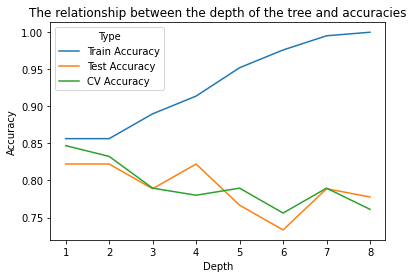

In [ ]:
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

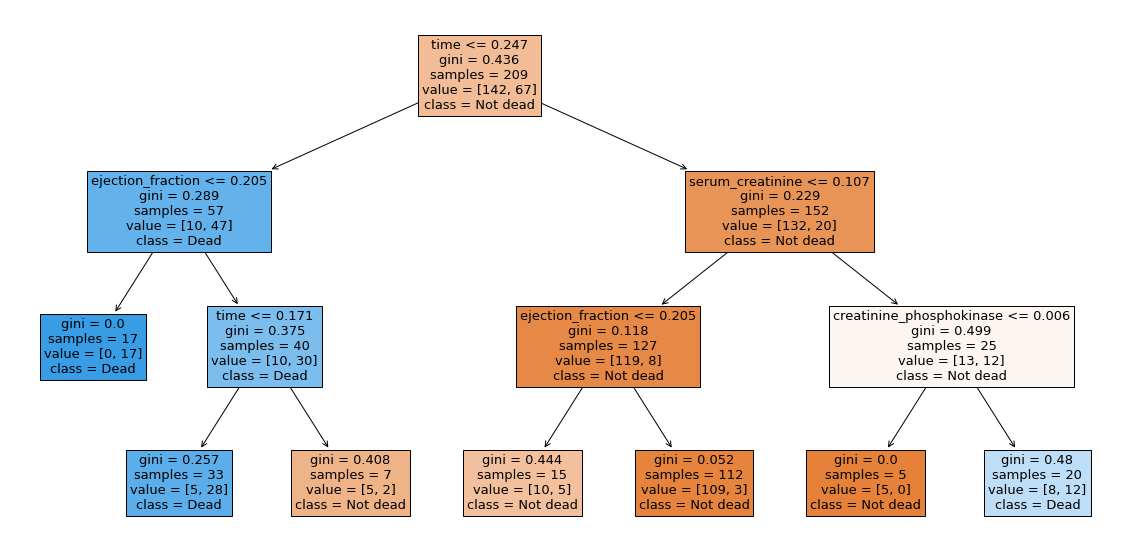

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_clf = tree_clf.fit(X_train,y_train)
plt.subplots(figsize=(20,10))
plot_tree(tree_clf, fontsize=13, feature_names=scaled_data.columns, class_names=['Not dead', 'Dead'], filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,8):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=d, criterion='gini', random_state=42)
    rf_clf = rf_clf.fit(X_train, y_train)
    
    train_accuracy = rf_clf.score(X_train, y_train)
    test_accuracy = rf_clf.score(X_test, y_test)
    cv_accuracy = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy )

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.7512          0.7222       0.7372
  2        0.8708          0.8000       0.8136
  3        0.9187          0.8333       0.8613
  4        0.9426          0.8556       0.8518
  5        0.9569          0.8111       0.8708
  6        0.9761          0.8222       0.8423
  7        1.0000          0.8444       0.8518


Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

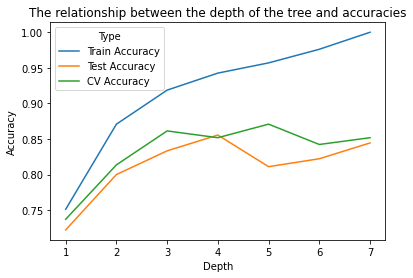

In [ ]:
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500],
    'max_depth': [2,3,4],
}
clf_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}

In [ ]:
print('CV Accuracy: %.4f' % clf_grid.best_score_)
print('Test Accuracy: %.4f' % clf_grid.score(X_test, y_test))

CV Accuracy: 0.8662
Test Accuracy: 0.8444


Text(0.5, 1.0, 'Feature Importances')

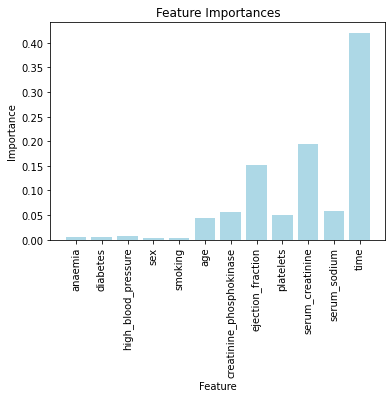

In [ ]:
rf_fi = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_fi = rf_fi.fit(X_train, y_train)

importances = list(rf_fi.feature_importances_)
scaled_data_col_name = list(scaled_data.columns[:-1].to_numpy())

plt.bar(scaled_data_col_name , importances, color='lightblue')
plt.xticks(ticks = scaled_data_col_name, labels = scaled_data_col_name, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

In [ ]:
from sklearn.svm import SVC
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2,3,4],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
clf_grid_SVC = GridSearchCV(estimator = SVC(random_state=42), param_grid=param_grid, cv=5)
clf_grid_SVC.fit(X_train, y_train)
clf_grid_SVC.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
print('CV Accuracy: %.4f' % clf_grid_SVC.best_score_)
print('Test Accuracy: %.4f' % clf_grid_SVC.score(X_test, y_test))

CV Accuracy: 0.8280
Test Accuracy: 0.8222


We compare the accuracy of models and the result shows that the model with the Random Forest classification techniqueperforms the highest accuracy at 0.8662.

| Models      | Accuracy 
| ------------| ----------- 
| Random Forest | 0.8662
| Decision Tree | 0.8470
| SVM | 0.8280